## Equations:

\begin{equation}
\frac{dS}{dt} =
+\mu N
-\left(\mu + \rho +  \beta_1 C \frac{I_1}{N} + \beta_2 C  \frac{I_2}{N} \right) S
\end{equation}

\begin{equation}
\frac{dV}{dt} =
\rho S - \left( \mu + (1 - p)\beta_2 C \frac{I_2}{N} \right) V
\end{equation}

\begin{equation}
\frac{dE_1}{dt} =
\beta_1 C \frac{I_1}{N} S
+\delta_1 - \left( \mu + \frac{1}{L} \right) E_1
\end{equation}

\begin{equation}
\frac{dE_2}{dt} =
\beta_2 C \frac{I_2}{N} S +\delta_2 
+\beta_2 C \frac{I_2}{N} V - \left(\mu + \frac{1}{L} \right) E_2
\end{equation}

\begin{equation}
\frac{dI_1}{dt} =
\frac{1}{L} E_1 
-\left( \mu + \frac{1}{\alpha} \right) I_1
\end{equation}

\begin{equation}
\frac{dI_2}{dt} =
\frac{1}{L} E_2 + 
-\left( \mu + \frac{1}{\alpha} \right) I_2
\end{equation}

\begin{equation}
\frac{dR}{dt} =
\frac{1}{\alpha} \left( I_1 + I_2 \right)
-\mu R
\end{equation}



- $\beta_1$ = Variant 1 Infection rate 
- $\beta_2$ = Variant 2 Infection rate 
- $C$ = Contact rate
- $\alpha$ = Recovery period (days)
- $\rho$ = Vaccination rate (fraction of S population)
- $\mu$ = Natural Birth\Death Rate (Assumed equal to keep N constant)
- $\delta_1$ = Import rate of people exposed to variant 1
- $\delta_2$ = Import rate of people exposed to variant 2


In [1]:
#relevant libraries\

import PyDSTool as dst
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# setting up initial conditions, parameters and variables
icdict = {'s': 1, 'l1':0, 'l2':0, 'i1': 1, 'i2':1, 'r':0, 'v': 0}
pardict = {'p':0, 'L': 4.7, 'beta1': 0.3332, 'beta2': 0.5644, 'c': 1, 'delta1': 0, 'delta2': 0, 'alpha': 10, 'N': 4900000, 'rho': 0, 'mu': 0.003}

# defining RHS of differential equations of the system
ds_rhs = 'mu * s - (beta1 * c * s * (i1/N)) - (beta2 * c * s * (i2/N)) - rho - mu * s'
dl1_rhs = '(beta1 * c * s * (i1/N)) + (1 - p)*(beta1 * c * v * (i1/N)) + (delta1) - ((1/L) * l1) - mu * l1'
dl2_rhs = '(beta2 * c * s * (i2/N)) + (1 - p)*(beta2 * c * v * (i2/N)) + (delta2) - ((1/L) * l2) - mu * l2'
di1_rhs = '((1/L) * l1) - (1/alpha * i1) - mu * i1'
di2_rhs = '((1/L) * l2) - (1/alpha * i2) - mu * i2'
dr_rhs = '(1/alpha) * (i1 +i2) - mu * r'
dv_rhs = 'rho - mu * v - (1 - p)*(beta2 * c * v * (i2/N)) - (1 - p)*(beta1 * c * v * (i1/N))'

vardict = {'s': ds_rhs, 'l1': dl1_rhs, 'l2': dl2_rhs, 'i1': di1_rhs, 'i2': di2_rhs, 'r': dr_rhs, 'v': dv_rhs} # tells DSTool that there are 5 dynamic state var's, specified by the eqns in the strings dS/dI/dR_rhs

DSargs = dst.args()
DSargs.name = 'SEIR3' # name the model
DSargs.ics = icdict # set initial condn's
DSargs.pars = pardict # set parameters
DSargs.tdata = [0, 20] # how long we expect to integrate for
DSargs.varspecs = vardict

#Generator
SEIR3 = dst.Generator.Vode_ODEsystem(DSargs)

# Plots for various contact rates $c$ from Dec 22nd 2020 to Mar 19th 2021, no immunity from variant 2

In [3]:
# initial conditions on Dedc 22nd, sourced from model 

s_9 = 4866551
l1_9 = 2059
i1_9 = 2653
l2_9 = 4075
i2_9 = 3505
r_9 = 25167

# $\beta_2$ 70% more contagious

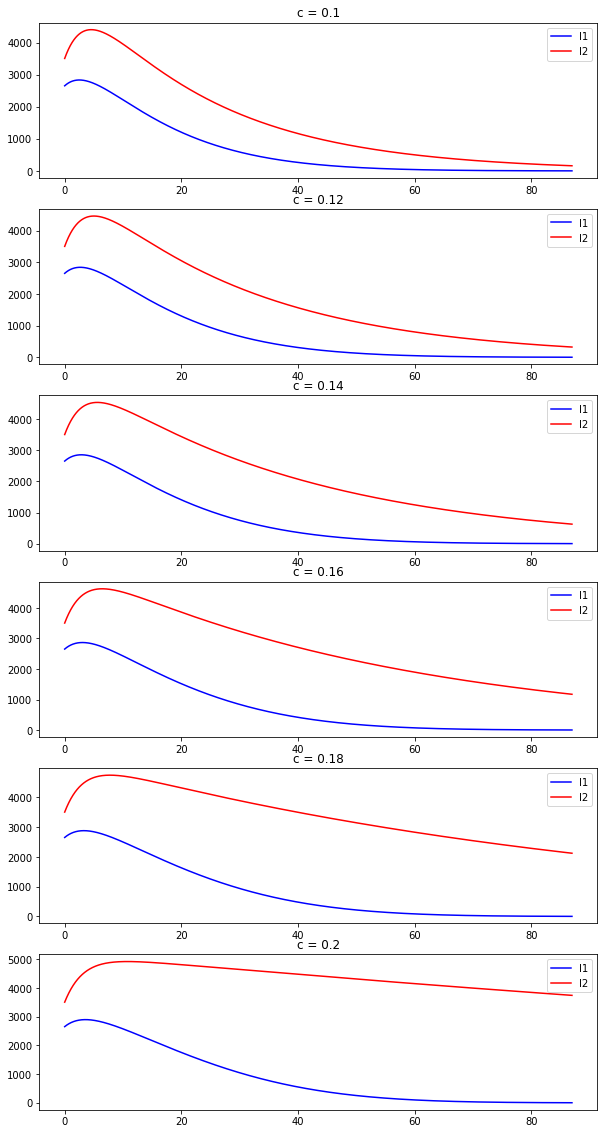

In [49]:
fig, axs = plt.subplots(6, figsize = (10,20))
row_index = 0
for param in [0.1, 0.12, 0.14, 0.16, 0.18, 0.2]:
    SEIR3.set( pars = {'c': param, 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 98000},
              ics = {'i1': i1_9, 'l1': l1_9, 's': s_9, 'r': r_9, 'l2': l2_9, 'i2': i2_9},
              tdata = [0,87] )
    tmp = SEIR3.compute('test').sample()  
    axs[row_index].plot(tmp['t'], tmp['i1'], color='b', label='I1')
    axs[row_index].plot(tmp['t'], tmp['i2'], color='r', label='I2')
    axs[row_index].legend(loc='upper right')
    axs[row_index].title.set_text('c = ' + str(param))
    row_index += 1
plt.show()

# $\beta_2$ 50% more contagious

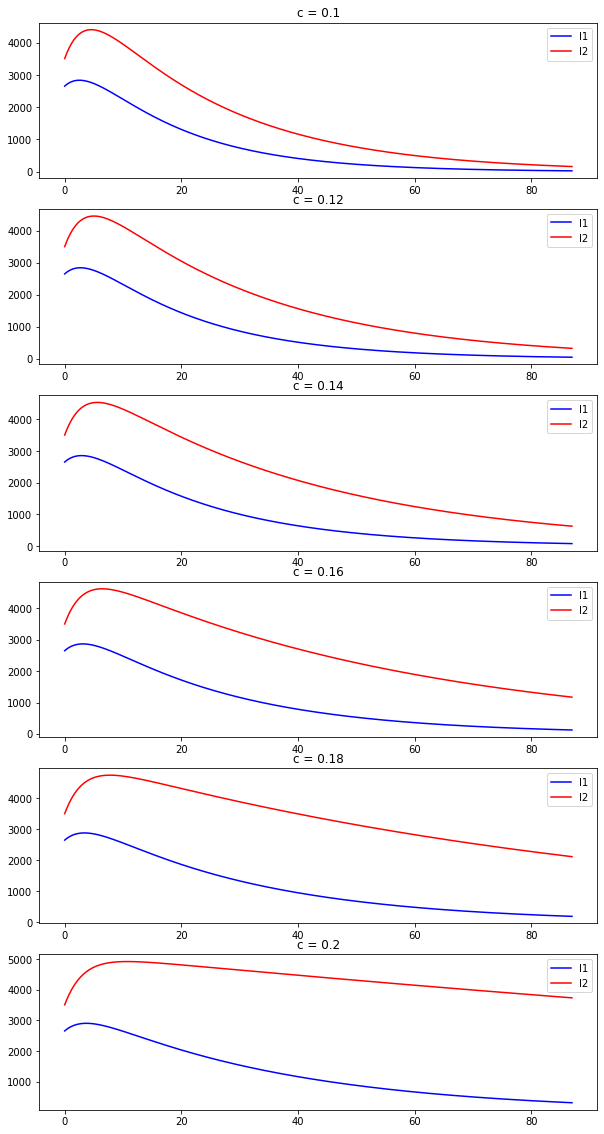

In [50]:
fig, axs = plt.subplots(6, figsize = (10,20))
row_index = 0
for param in [0.1, 0.12, 0.14, 0.16, 0.18, 0.2]:
    SEIR3.set( pars = {'c': param, 'beta2': 0.4998, 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 0.0006},
              ics = {'i1': i1_9, 'l1': l1_9, 's': s_9, 'r': r_9, 'l2': l2_9, 'i2': i2_9},
              tdata = [0,87] )
    tmp = SEIR3.compute('test').sample()  
    axs[row_index].plot(tmp['t'], tmp['i1'], color='b', label='I1')
    axs[row_index].plot(tmp['t'], tmp['i2'], color='r', label='I2')
    axs[row_index].legend(loc='upper right')
    axs[row_index].title.set_text('c = ' + str(param))
    row_index += 1
plt.show()

# $\beta_2$ 40% more contagious

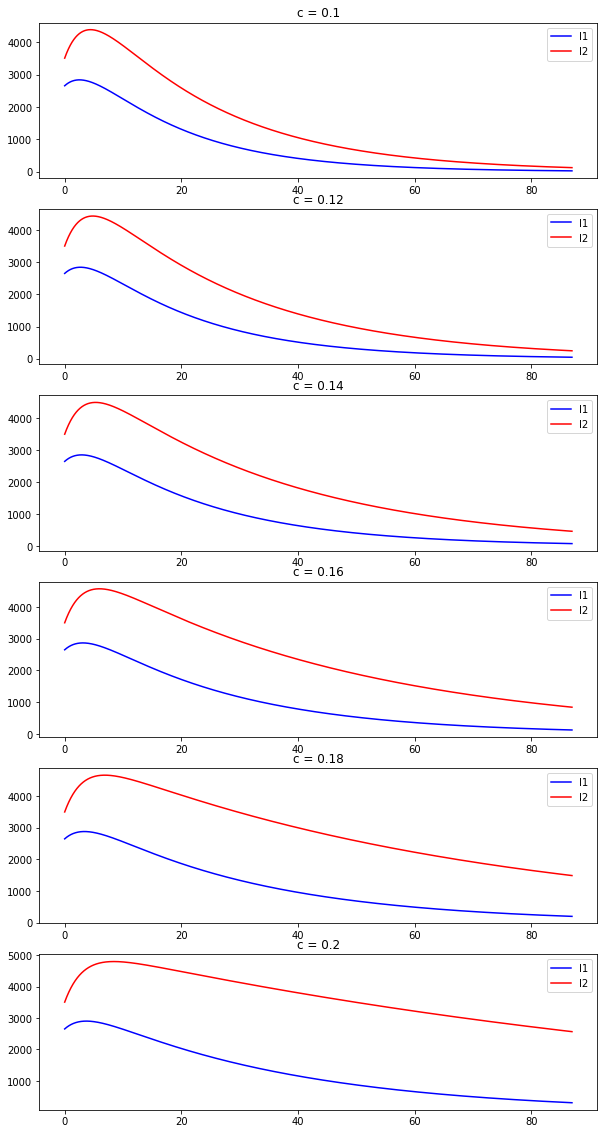

In [51]:
fig, axs = plt.subplots(6, figsize = (10,20))
row_index = 0
for param in [0.1, 0.12, 0.14, 0.16, 0.18, 0.2]:
    SEIR3.set( pars = {'c': param, 'beta2': 0.4665, 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 0.001},
              ics = {'i1': i1_9, 'l1': l1_9, 's': s_9, 'r': r_9, 'l2': l2_9, 'i2': i2_9},
              tdata = [0,87] )
    tmp = SEIR3.compute('test').sample()  
    axs[row_index].plot(tmp['t'], tmp['i1'], color='b', label='I1')
    axs[row_index].plot(tmp['t'], tmp['i2'], color='r', label='I2')
    axs[row_index].legend(loc='upper right')
    axs[row_index].title.set_text('c = ' + str(param))
    row_index += 1
plt.show()

From above plots c = 0.16 seems to be a better choice for level 5

# Deciding on Contagiousness

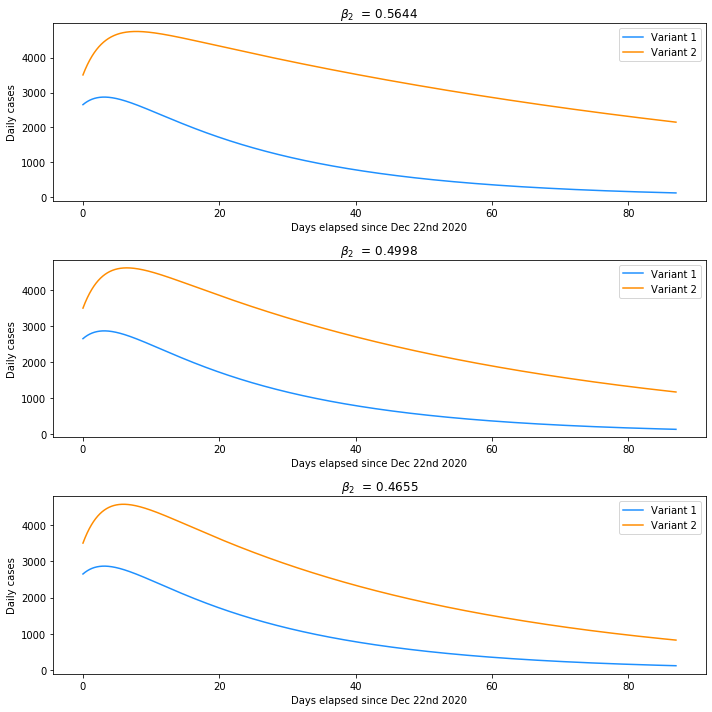

In [27]:
fig, axs = plt.subplots(3, figsize=(10,10))
row_index = 0
for param in [0.5644, 0.4998, 0.4655]:
    SEIR3.set( pars = {'c': 0.16, 'beta2': param, 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 0},
              ics = {'i1': i1_9, 'l1': l1_9, 's': s_9, 'r': r_9, 'l2': l2_9, 'i2': i2_9},
              tdata = [0,87] )
    tmp = SEIR3.compute('test').sample()  
    axs[row_index].plot(tmp['t'], tmp['i1'], color='dodgerblue', label='Variant 1')
    axs[row_index].plot(tmp['t'], tmp['i2'], color='darkorange', label='Variant 2')
    axs[row_index].legend(loc='upper right')
    axs[row_index].title.set_text(r'$\beta_2$  = ' + str(param))
    axs[row_index].set_xlabel('Days elapsed since Dec 22nd 2020')
    axs[row_index].set_ylabel('Daily cases')
    row_index += 1

fig.tight_layout()    
plt.savefig('Various Variant 2 Infection Rates')



# Continuing with c = 0.16 and 40% more contagious 2nd variant

## Getting data points for April 5th 2021 with 

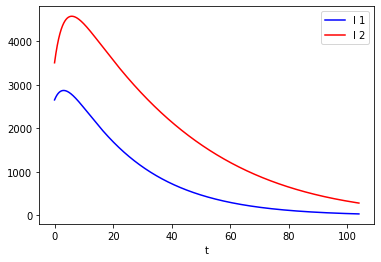

In [122]:
# vax rate assumed: 2% of N per week, immunity 60%
SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.9, 'mu': 0.003},
        ics={'i1': i1_9, 'l1': l1_9, 's': s_9, 'r': r_9, 'l2': l2_9, 'i2': i2_9},
        tdata=[0,104]) # 22 Dec 2020 to 5 Apr 2021

# computing points for plotting 
traj_SEIR3_60 = SEIR3.compute('test')
pts_SEIR3_60 = traj_SEIR3_60.sample()

# creating plot
plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['i1'], label='I 1', color='b')
plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['i2'], label='I 2', color='r') 
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['s'], label='S', color='y')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

In [123]:
pts_SEIR3_60

Pointset <no name> (parameterized)
Independent variable:
t:  [0.         0.01000096, ..., 103.98999904 104.        ]
Coordinates:
i1:  [2653.         2654.64434219, ..., 35.6773721 35.6591524]
i2:  [3505.         3510.05136142, ..., 284.76331943 284.65974048]
l1:  [2059.         2055.96549316, ..., 8.70689983 8.7022433 ]
l2:  [4075.         4068.81373449, ..., 89.16867799 89.13417581]
r:  [25167.        25172.4067788, ..., 41465.45075504 41464.52709635]
s:  [4866551.         4866419.83929031, ..., 3526398.27343003 3526270.95171172]
v:  [  0.         127.15317087, ..., 1135676.98513852 1135770.0598732 ]
Labels by index: Empty

In [91]:
print('Variant 2 Infected Daily Case rate on apr 5th = ' +  str(pts_SEIR3_60['i2'][-1]))

Variant Infected Daily Case rate on apr 5th = 309.2406811835054


In [86]:
pts_SEIR3_60

Pointset <no name> (parameterized)
Independent variable:
t:  [0.         0.01000096, ..., 103.98999904 104.        ]
Coordinates:
i1:  [2653.         2654.64434219, ..., 38.12680498 38.1080715 ]
i2:  [3505.         3510.05136142, ..., 309.34576116 309.24068118]
l1:  [2059.         2055.96549331, ..., 9.65120975 9.64631034]
l2:  [4075.         4068.81373475, ..., 100.36383808 100.3281773 ]
r:  [25167.        25172.4067788, ..., 41621.74016088 41620.83884618]
s:  [4866551.        4866420.8448089, ..., 3725181.00464756 3725088.90793311]
v:  [  0.         127.15317087, ..., 1135675.10157294 1135768.17590858]
Labels by index: Empty

## Different Lockdown levels from Apr 5th 2021

In [124]:
# IC's from model 

s_ap_5 = pts_SEIR3_60['s'][-1]
l1_ap_5 = pts_SEIR3_60['l1'][-1]
i1_ap_5 = pts_SEIR3_60['i1'][-1]
l2_ap_5 = pts_SEIR3_60['l2'][-1]
i2_ap_5 = pts_SEIR3_60['i2'][-1]
r_ap_5 = pts_SEIR3_60['r'][-1]


## 90% Immunity ($p = 0.9$)

### Level 5 ($c = 0.16$)

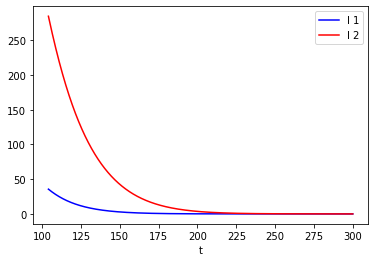

In [155]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.9, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level5_90 = SEIR3.compute('test')
pts_level5_90 = traj_level5_90.sample()

# creating plot
plt.plot(pts_level5_90['t'], pts_level5_90['i1'], label='I 1', color='b')
plt.plot(pts_level5_90['t'], pts_level5_90['i2'], label='I 2', color='r')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['s'], label='S', color='y')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

### Level 4 ($c = 0.3$)

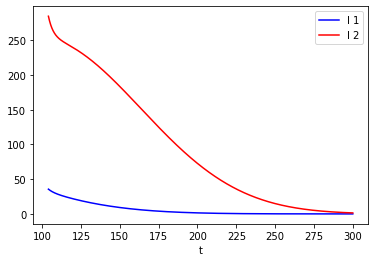

In [186]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.3 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.9, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level4_90 = SEIR3.compute('test')
pts_level4_90 = traj_level4_90.sample()

# creating plot
plt.plot(pts_level4_90['t'], pts_level4_90['i1'], label='I 1', color='b')
plt.plot(pts_level4_90['t'], pts_level4_90['i2'], label='I 2', color='r')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['s'], label='S', color='y')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

### Level 3 ($c = 0.4$)

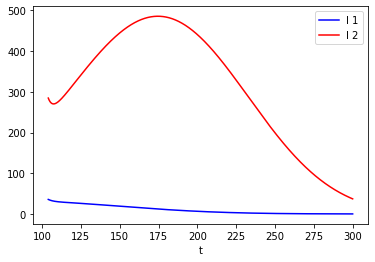

In [156]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.4 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.9, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level3_90 = SEIR3.compute('test')
pts_level3_90 = traj_level3_90.sample()

# creating plot
plt.plot(pts_level3_90['t'], pts_level3_90['i1'], label='I 1', color='b')
plt.plot(pts_level3_90['t'], pts_level3_90['i2'], label='I 2', color='r')
#plt.plot(pts_level3['t'], pts_level3['s'], label='S', color='y')
#plt.plot(pts_level3['t'], pts_level3['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

### Level 2 ($c = 0.6$)

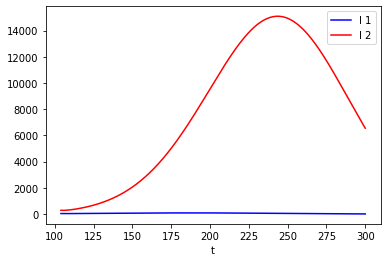

In [182]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.6 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.9, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level2_90 = SEIR3.compute('test')
pts_level2_90 = traj_level2_90.sample()

# creating plot
plt.plot(pts_level2_90['t'], pts_level2_90['i1'], label='I 1', color='b')
plt.plot(pts_level2_90['t'], pts_level2_90['i2'], label='I 2', color='r')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['s'], label='S', color='y')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

### Level 1 ($c = 0.7$)

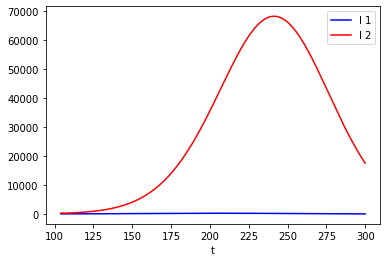

In [152]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.7 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.9, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level1 = SEIR3.compute('test')
pts_level1 = traj_level1.sample()

# creating plot
plt.plot(pts_level1['t'], pts_level1['i1'], label='I 1', color='b')
plt.plot(pts_level1['t'], pts_level1['i2'], label='I 2', color='r')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['s'], label='S', color='y')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

In [130]:
pts_level3['v'][260]

32930.179699281965

## 45% Immunity

### Level 5 ($c = 0.16$)

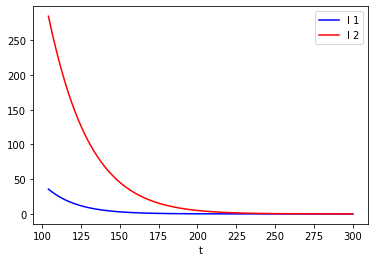

In [188]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.45, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level5_45 = SEIR3.compute('test')
pts_level5_45 = traj_level5_45.sample()

# creating plot
plt.plot(pts_level5_45['t'], pts_level5_45['i1'], label='I 1', color='b')
plt.plot(pts_level5_45['t'], pts_level5_45['i2'], label='I 2', color='r')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['s'], label='S', color='y')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

### Level 4 ($c = 0.3$)

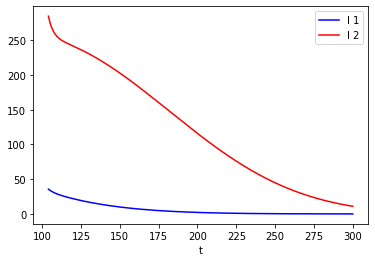

In [185]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.3 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.45, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level4_45 = SEIR3.compute('test')
pts_level4_45 = traj_level4_45.sample()

# creating plot
plt.plot(pts_level4_45['t'], pts_level4_45['i1'], label='I 1', color='b')
plt.plot(pts_level4_45['t'], pts_level4_45['i2'], label='I 2', color='r')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['s'], label='S', color='y')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

### Level 3 ($c = 0.4$)

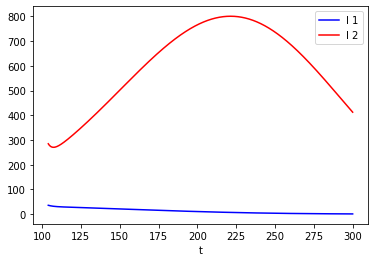

In [157]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.4 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.45, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level3_45 = SEIR3.compute('test')
pts_level3_45 = traj_level3_45.sample()

# creating plot
plt.plot(pts_level3_45['t'], pts_level3_45['i1'], label='I 1', color='b')
plt.plot(pts_level3_45['t'], pts_level3_45['i2'], label='I 2', color='r')
#plt.plot(pts_level3['t'], pts_level3['s'], label='S', color='y')
#plt.plot(pts_level3['t'], pts_level3['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

### Level 2 ($c = 0.6$)

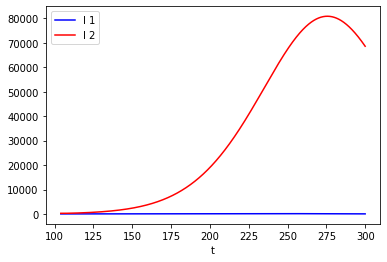

In [183]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.6 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.45, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level2_45 = SEIR3.compute('test')
pts_level2_45 = traj_level2_45.sample()

# creating plot
plt.plot(pts_level2_45['t'], pts_level2_45['i1'], label='I 1', color='b')
plt.plot(pts_level2_45['t'], pts_level2_45['i2'], label='I 2', color='r')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['s'], label='S', color='y')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['v'], label='V', color='k')
#plt.plot(pts_SEIR3_60['t'], pts_SEIR3_60['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

### Level 1 ($c = 0.7$)

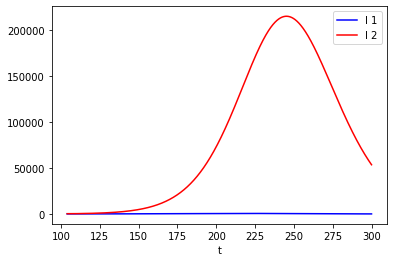

In [194]:
# vax rate assumed: 2% of population per week ~ 89,0000 people/week

SEIR3.set(pars={'c': 0.7 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 89000/7, 'p': 0.45, 'mu': 0.003},
        ics={'i1': i1_ap_5, 'l1': l1_ap_5, 's': s_ap_5, 'r': r_ap_5, 'l2': l2_ap_5, 'i2': i2_ap_5},
        tdata=[104,300]) # days from 5 Apr 2021

# computing points for plotting 
traj_level1 = SEIR3.compute('test')
pts_level1 = traj_level1.sample()

# creating plot
plt.plot(pts_level1['t'], pts_level1['i1'], label='I 1', color='b')
plt.plot(pts_level1['t'], pts_level1['i2'], label='I 2', color='r')
#plt.plot(pts_level1['t'], pts_level1['s'], label='S', color='y')
#plt.plot(pts_level1['t'], pts_level1['v'], label='V', color='k')
#plt.plot(pts_level1['t'], pts_level1['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

## Comparison

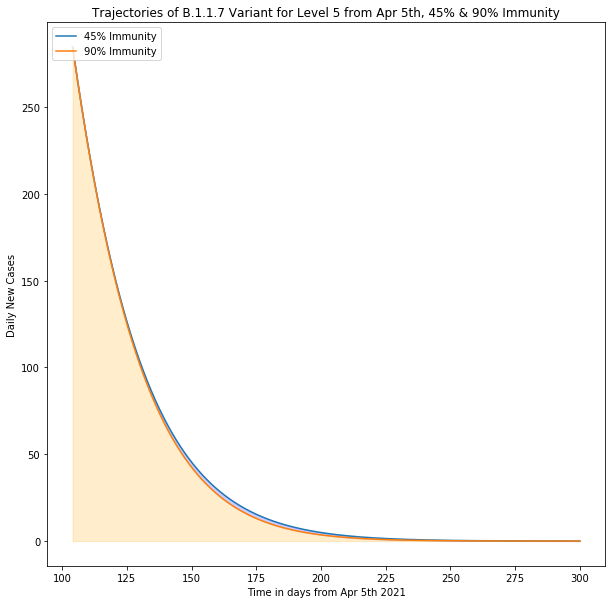

In [190]:
plt.figure(figsize=(10,10))

# Title, axes
plt.title('Trajectories of B.1.1.7 Variant for Level 5 from Apr 5th, 45% & 90% Immunity')
plt.xlabel('Time in days from Apr 5th 2021')
plt.ylabel('Daily New Cases')

# Curves
plt.plot(pts_level5_45['t'], pts_level5_45['i2'], label='45% Immunity')
plt.plot(pts_level5_90['t'], pts_level5_90['i2'], label='90% Immunity')

# Data
x =  pts_level5_45['t']
y1 = pts_level5_45['i2']
y2 = pts_level5_90['i2']

# Shade the area between y1 and line y=0
plt.fill_between(x, y1, y2,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

# Shade the area between y2 and line y=0
plt.fill_between(x, y2, 0,
                 facecolor="black", # The fill color
                 color='orange',       # The outline color
                 alpha=0.2)          # Transparency of the fill

plt.legend(loc='upper left')
plt.show()

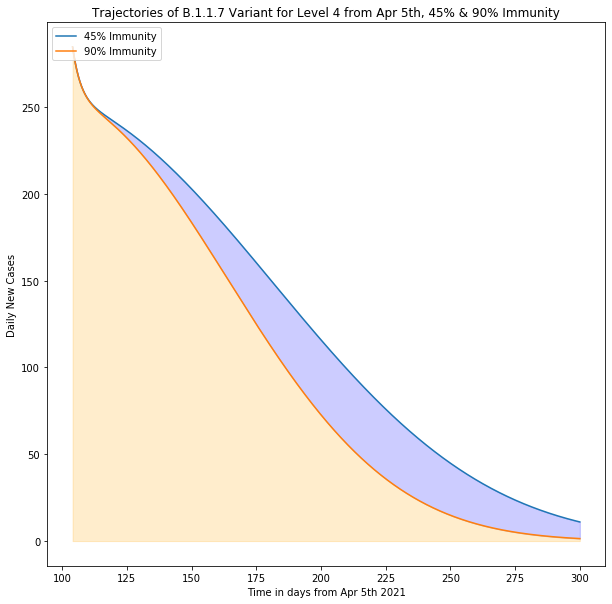

In [191]:
plt.figure(figsize=(10,10))

# Title, axes
plt.title('Trajectories of B.1.1.7 Variant for Level 4 from Apr 5th, 45% & 90% Immunity')
plt.xlabel('Time in days from Apr 5th 2021')
plt.ylabel('Daily New Cases')

# Curves
plt.plot(pts_level4_45['t'], pts_level4_45['i2'], label='45% Immunity')
plt.plot(pts_level4_90['t'], pts_level4_90['i2'], label='90% Immunity')

# Data
x =  pts_level4_45['t']
y1 = pts_level4_45['i2']
y2 = pts_level4_90['i2']

# Shade the area between y1 and line y=0
plt.fill_between(x, y1, y2,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

# Shade the area between y2 and line y=0
plt.fill_between(x, y2, 0,
                 facecolor="black", # The fill color
                 color='orange',       # The outline color
                 alpha=0.2)          # Transparency of the fill

plt.legend(loc='upper left')
plt.show()

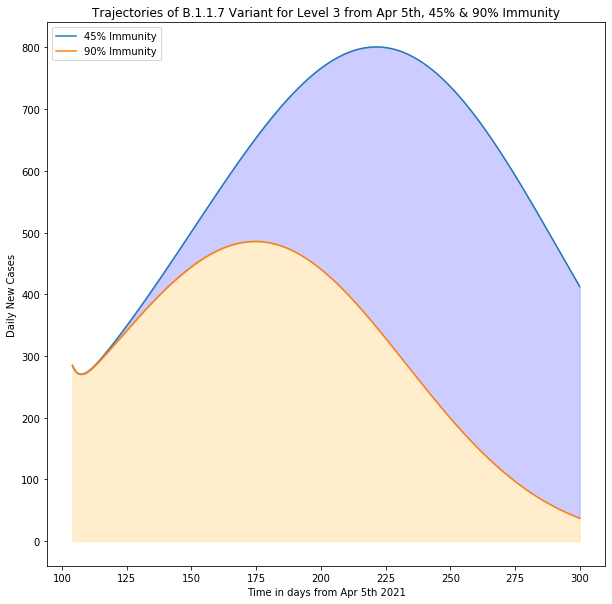

In [181]:
plt.figure(figsize=(10,10))

# Title, axes
plt.title('Trajectories of B.1.1.7 Variant for Level 3 from Apr 5th, 45% & 90% Immunity')
plt.xlabel('Time in days from Apr 5th 2021')
plt.ylabel('Daily New Cases')

# Curves
plt.plot(pts_level3_45['t'], pts_level3_45['i2'], label='45% Immunity')
plt.plot(pts_level3_90['t'], pts_level3_90['i2'], label='90% Immunity')

# Data
x =  pts_level3_45['t']
y1 = pts_level3_45['i2']
y2 = pts_level3_90['i2']

# Shade the area between y1 and line y=0
plt.fill_between(x, y1, y2,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

# Shade the area between y2 and line y=0
plt.fill_between(x, y2, 0,
                 facecolor="black", # The fill color
                 color='orange',       # The outline color
                 alpha=0.2)          # Transparency of the fill

plt.legend(loc='upper left')
plt.show()

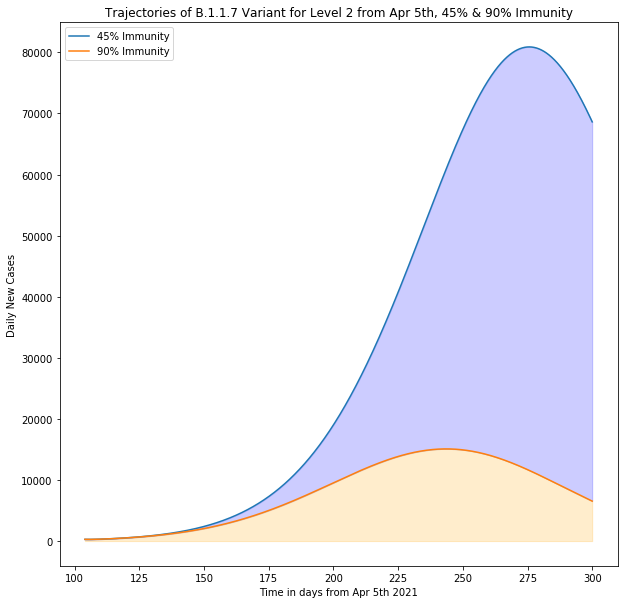

In [184]:
plt.figure(figsize=(10,10))

# Title, axes
plt.title('Trajectories of B.1.1.7 Variant for Level 2 from Apr 5th, 45% & 90% Immunity')
plt.xlabel('Time in days from Apr 5th 2021')
plt.ylabel('Daily New Cases')

# Curves
plt.plot(pts_level2_45['t'], pts_level2_45['i2'], label='45% Immunity')
plt.plot(pts_level2_90['t'], pts_level2_90['i2'], label='90% Immunity')

# Data
x =  pts_level2_45['t']
y1 = pts_level2_45['i2']
y2 = pts_level2_90['i2']

# Shade the area between y1 and line y=0
plt.fill_between(x, y1, y2,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

# Shade the area between y2 and line y=0
plt.fill_between(x, y2, 0,
                 facecolor="black", # The fill color
                 color='orange',       # The outline color
                 alpha=0.2)          # Transparency of the fill

plt.legend(loc='upper left')
plt.show()